In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#unmount drive
'''from google.colab import drive
drive.flush_and_unmount()'''

'from google.colab import drive\ndrive.flush_and_unmount()'

In [ ]:
import os
import zipfile

Fetching the dataset

In [ ]:
local_zip = '/content/drive/MyDrive/driver_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/driver_train')

local_zip = '/content/drive/MyDrive/driver_test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/driver_test')


zip_ref.close()

In [ ]:
train_alert_dir = os.path.join('/content/drive/MyDrive/driver_train/driver_train/alert')
train_drowsy_dir = os.path.join('/content/drive/MyDrive/driver_train/driver_train/drowsy')

test_alert_dir = os.path.join('/content/drive/MyDrive/driver_test/driver_test/alert')
test_drowsy_dir = os.path.join('/content/drive/MyDrive/driver_test/driver_test/drowsy')

In [ ]:
train_alert_names = os.listdir(train_alert_dir)
print(train_alert_names[:10])

train_drowsy_names = os.listdir(train_drowsy_dir)
print(train_drowsy_names[:10])

test_alert_names = os.listdir(test_alert_dir)
print(test_alert_names[:10])

test_drowsy_names = os.listdir(test_drowsy_dir)
print(test_drowsy_names[:10])


['alert161.jpg', 'alert162.jpg', 'alert163.jpg', 'alert164.jpg', 'alert165.jpg', 'alert167.jpg', 'alert166.jpg', 'alert168.jpg', 'alert169.jpg', 'alert17.jpg']
['drowsy_1_219.jpg', 'drowsy_1_218.jpg', 'drowsy_1_22.jpg', 'drowsy_1_220.jpg', 'drowsy_1_222.jpg', 'drowsy_1_221.jpg', 'drowsy1.jpg', 'drowsy0.jpg', 'drowsy10.jpg', 'drowsy100.jpg']
['alert_1_137.jpg', 'alert_1_138.jpg', 'alert_1_139.jpg', 'alert_1_140.jpg', 'alert_1_141.jpg', 'alert_1_30.jpg', 'alert_1_31.jpg', 'alert_1_32.jpg', 'alert_1_33.jpg', 'alert_1_34.jpg']
['drowsy_1_138.jpg', 'drowsy_1_139.jpg', 'drowsy_1_141.jpg', 'drowsy_1_142.jpg', 'drowsy_1_140.jpg', 'drowsy_1_143.jpg', 'drowsy_1_144.jpg', 'drowsy_1_145.jpg', 'drowsy_1_146.jpg', 'drowsy_1_147.jpg']


In [ ]:
print('TRAINING SET')
print('No. of Alert images: ', len(os.listdir(train_alert_dir)))
print('No. of Drowsy images: ', len(os.listdir(train_drowsy_dir)))
print('\nTESTING SET')
print('No. of Alert images: ', len(os.listdir(test_alert_dir)))
print('No. of Drowsy images: ', len(os.listdir(test_drowsy_dir)))

TRAINING SET
No. of Alert images:  716
No. of Drowsy images:  437

TESTING SET
No. of Alert images:  250
No. of Drowsy images:  250


Data Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15,
    zoom_range = 0.2,
    shear_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/driver_train/driver_train',
    target_size = (150,150),
    batch_size = 128,
    class_mode = 'binary'
)
print(train_generator.classes[0])

Found 1153 images belonging to 2 classes.
0


(150, 150, 3)


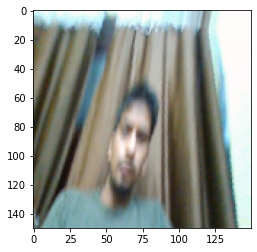

In [ ]:
x,y = train_generator.next()
for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/driver_test/driver_test',
    target_size =  (150,150),
    batch_size = 32,
    class_mode = 'binary'
)
print(validation_generator.classes[0])

Found 500 images belonging to 2 classes.
0


(150, 150, 3)


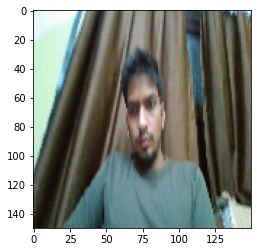

In [ ]:
x,y = validation_generator.next()

for i in range(0,1):
  image = x[i]
  plt.imshow(image)
  print(image.shape)

VGGNet-16 Pre-trained Model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
model = VGG16(weights = 'imagenet', include_top = False)

x = model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

vgg_model = Model(model.input, x)

for layer in model.layers:
  layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

GoogleNet (Inception)

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
model = InceptionV3(weights = 'imagenet', include_top = False)

x = model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

inception_model = Model(model.input, x)

for layer in model.layers:
  layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
inception_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

ResNet-50

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50

In [ ]:
model = ResNet50(weights = 'imagenet', include_top = False)

x = model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(2, activation='softmax')(x)

resnet_model = Model(model.input, x)

for layer in model.layers:
  layer.trainable = False

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
resnet_model.compile(loss='sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Training

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
history1 = vgg_model.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 73s 6s/step - loss: 0.7538 - accuracy: 0.5452 - val_loss: 0.6526 - val_accuracy: 0.5780
Epoch 2/30
10/10 [==============================] - 63s 6s/step - loss: 0.6194 - accuracy: 0.6265 - val_loss: 0.5717 - val_accuracy: 0.7060
Epoch 3/30
10/10 [==============================] - 63s 6s/step - loss: 0.5780 - accuracy: 0.6981 - val_loss: 0.6215 - val_accuracy: 0.5940
Epoch 4/30
10/10 [==============================] - 62s 6s/step - loss: 0.5671 - accuracy: 0.6941 - val_loss: 0.5115 - val_accuracy: 0.8320
Epoch 5/30
10/10 [==============================] - 63s 6s/step - loss: 0.5400 - accuracy: 0.7200 - val_loss: 0.5980 - val_accuracy: 0.6100
Epoch 6/30
10/10 [==============================] - 63s 6s/step - loss: 0.4982 - accuracy: 0.7488 - val_loss: 0.4691 - val_accuracy: 0.8240
Epoch 7/30
10/10 [==============================] - 63s 6s/step - loss: 0.4804 - accuracy: 0.7728 - val_loss: 0.5292 - val_accuracy: 0.6100
Epoch 8/30
10/10 [==

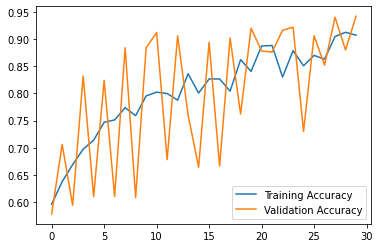

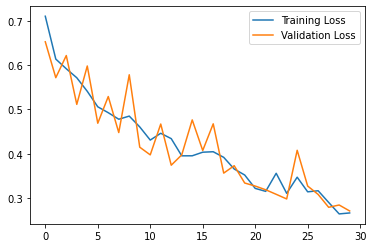

In [ ]:
v_acc = history1.history['accuracy']
v_val_acc = history1.history['val_accuracy']
v_loss = history1.history['loss']
v_val_loss = history1.history['val_loss']

epochs = range(len(v_acc))

plt.plot(epochs, v_acc, label='Training Accuracy')
plt.plot(epochs, v_val_acc, label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, v_loss, label='Training Loss')
plt.plot(epochs, v_val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
history2 = inception_model.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 72s 7s/step - loss: 1.6963 - accuracy: 0.4800 - val_loss: 0.9960 - val_accuracy: 0.5840
Epoch 2/30
10/10 [==============================] - 63s 6s/step - loss: 0.7035 - accuracy: 0.6933 - val_loss: 0.4300 - val_accuracy: 0.8320
Epoch 3/30
10/10 [==============================] - 62s 7s/step - loss: 0.5008 - accuracy: 0.7495 - val_loss: 0.4652 - val_accuracy: 0.7700
Epoch 4/30
10/10 [==============================] - 62s 6s/step - loss: 0.5561 - accuracy: 0.7410 - val_loss: 0.6465 - val_accuracy: 0.6260
Epoch 5/30
10/10 [==============================] - 62s 6s/step - loss: 0.4970 - accuracy: 0.7895 - val_loss: 1.0003 - val_accuracy: 0.6220
Epoch 6/30
10/10 [==============================] - 62s 6s/step - loss: 0.4860 - accuracy: 0.7854 - val_loss: 0.6851 - val_accuracy: 0.6620
Epoch 7/30
10/10 [==============================] - 62s 6s/step - loss: 0.4042 - accuracy: 0.8164 - val_loss: 0.3882 - val_accuracy: 0.8440
Epoch 8/30
10/10 [==

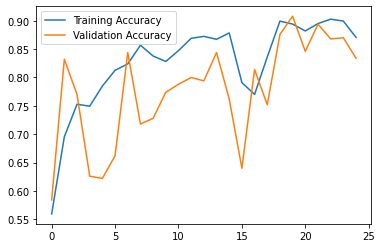

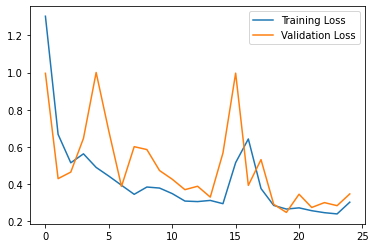

In [ ]:
i_acc = history2.history['accuracy']
i_val_acc = history2.history['val_accuracy']
i_loss = history2.history['loss']
i_val_loss = history2.history['val_loss']

epochs = range(len(i_acc))

plt.plot(epochs, i_acc, label='Training Accuracy')
plt.plot(epochs, i_val_acc, label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, i_loss, label='Training Loss')
plt.plot(epochs, i_val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
history3 = resnet_model.fit_generator(
    train_generator,
    epochs = 30,
    validation_data = validation_generator,
    callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
10/10 [==============================] - 71s 7s/step - loss: 0.7666 - accuracy: 0.5080 - val_loss: 0.7090 - val_accuracy: 0.5000
Epoch 2/30
10/10 [==============================] - 63s 6s/step - loss: 0.6949 - accuracy: 0.6135 - val_loss: 0.7799 - val_accuracy: 0.5000
Epoch 3/30
10/10 [==============================] - 63s 6s/step - loss: 0.6597 - accuracy: 0.6285 - val_loss: 0.7437 - val_accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 63s 6s/step - loss: 0.6672 - accuracy: 0.6183 - val_loss: 0.6993 - val_accuracy: 0.5000
Epoch 5/30
10/10 [==============================] - 63s 6s/step - loss: 0.7063 - accuracy: 0.4871 - val_loss: 0.9070 - val_accuracy: 0.5000
Epoch 6/30
10/10 [==============================] - 63s 6s/step - loss: 0.7017 - accuracy: 0.6241 - val_loss: 0.6717 - val_accuracy: 0.7460
Epoch 7/30
10/10 [==============================] - 63s 6s/step - loss: 0.6649 - accuracy: 0.6257 - val_loss: 0.7037 - val_accuracy: 0.5000
Epoch 8/30
10/10 [==

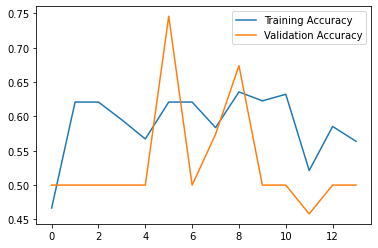

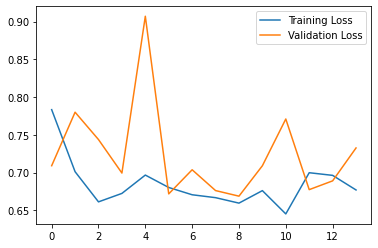

In [ ]:
r_acc = history3.history['accuracy']
r_val_acc = history3.history['val_accuracy']
r_loss = history3.history['loss']
r_val_loss = history3.history['val_loss']

epochs = range(len(r_acc))

plt.plot(epochs, r_acc, label='Training Accuracy')
plt.plot(epochs, r_val_acc, label='Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, r_loss, label='Training Loss')
plt.plot(epochs, r_val_loss, label='Validation Loss')
plt.legend()
plt.show()

Comparison of Accuracies

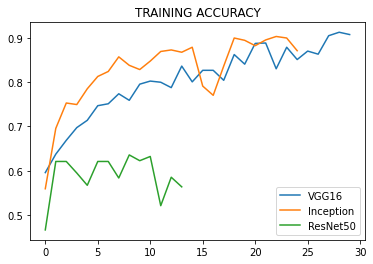

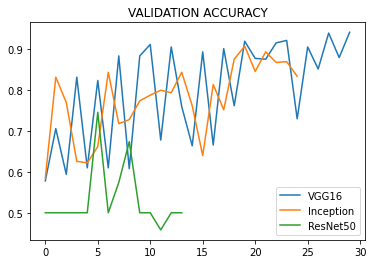

In [ ]:
plt.plot(v_acc, label='VGG16')
plt.plot(i_acc, label='Inception')
plt.plot(r_acc, label='ResNet50')

plt.title('TRAINING ACCURACY')
plt.legend()

plt.figure()

plt.plot(v_val_acc, label='VGG16')
plt.plot(i_val_acc, label='Inception')
plt.plot(r_val_acc, label='ResNet50')
plt.title('VALIDATION ACCURACY')
plt.legend()
plt.show()

Comparison of Losses

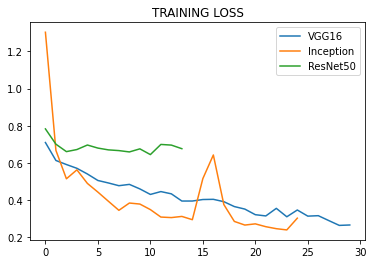

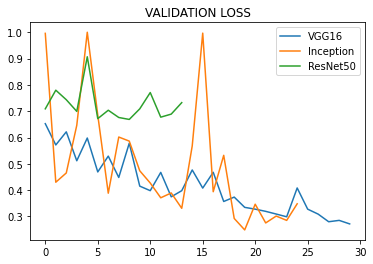

In [ ]:
plt.plot(v_loss, label='VGG16')
plt.plot(i_loss, label='Inception')
plt.plot(r_loss, label='ResNet50')

plt.title('TRAINING LOSS')
plt.legend()

plt.figure()

plt.plot(v_val_loss, label='VGG16')
plt.plot(i_val_loss, label='Inception')
plt.plot(r_val_loss, label='ResNet50')
plt.title('VALIDATION LOSS')
plt.legend()
plt.show()

In [ ]:
!pip install ann_visualizer

In [ ]:
ann_viz(vgg_model, view=True, title= "My Neural Network")

ValueError: ignored

Saving the model

In [ ]:
model.save('driver drowsiness.h5')

Prediction

In [ ]:
!git clone https://github.com/opencv/opencv.git

In [ ]:
!mkdir Video

In [ ]:
!pip install ffmpeg-python


from IPython.display import HTML, Javascript, display
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
import ffmpeg

video_file_test = '/content/Video/osy_test.mp4' 
  

VIDEO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var my_btn_txt = document.createTextNode("Press to start recording");

my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, videoStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  videoStream = stream;
  var options = {  
    mimeType : 'video/webm;codecs=vp9'  
  };            
  recorder = new MediaRecorder(stream, options);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('video');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({video: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      videoStream.getVideoTracks()[0].stop();
      recordButton.innerText = "Saving the recording... Please wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def start_webcam():
  js = Javascript('''
    async function startWebcam() {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      return;

    }
    ''')
  
  display(js)
  data = eval_js('startWebcam()')
  
    
start_webcam()

def get_video():
  display(HTML(VIDEO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  return binary

In [ ]:
videofile = get_video()

with open(video_file_test, 'wb') as f:
  f.write(videofile)

In [ ]:
import cv2  
from google.colab.patches import cv2_imshow

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')  

cap = cv2.VideoCapture(video_file_test) 
  
count = 1
while cap.isOpened() & count<30:
  
    ret, img = cap.read()  
  
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGR) 
  
    # Detects faces of different sizes in the input image 
    faces = face_cascade.detectMultiScale(img, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
        #roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w] 
  
        eyes = eye_cascade.detectMultiScale(roi_color)  
  
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 

    cv2_imshow(img) 
  
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
  
cap.release() 
cv2.destroyAllWindows()